# Lead Scoring Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

#### Importing the libraries

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


# Importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Application Data Analysis
#### 1. Reading the dataset

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 2. Basic Metadata Check

In [3]:
# Checking the dimensions
leads.shape

(9240, 37)

In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 2. Data Cleaning

#### We can observe that many of the categorical variables have a level called 'Select' as the customers did not select any option from the list. We can simply replace them with null value.

In [6]:
# Converting 'Select' values to NaN.
leads = leads.replace('Select',np.nan)

In [7]:
# Checking number of unique values per column
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Drop unique valued columns
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [9]:
# Check for percentage of null values in each column
missing_val_percent = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(missing_val_percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
# Converting the null values into percentages
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Removing the columns that have more than 45% null values
leads.drop(columns=['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],inplace=True)

In [12]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Though there is a huge value of null values in some columns but removing such rows will cost a lot of data loss and they are important columns. Instead we will replace the NaN values with 'not provided' to avoid null values. In case these come up in the model, it will be of no use and we can drop it off then.

We will individually explore the columns with high percentage of null values, i.e. above 30% to take care of null values

In [13]:
# Check City column
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [14]:
leads.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [15]:
# Around 58% of the data is Mumbai, so we can impute the missing values with 'Mumbai'
leads['City'] = leads['City'].replace(np.nan,'Mumbai')
leads.City.value_counts(normalize=True)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [16]:
# Check Specialization column
leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [17]:
leads.Specialization.value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

There are 30% null values, we will replace those with 'Others'.
Reason for not choosing specialization can be either it was not in the list or the leads don't have a specialization yet.

In [18]:
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Others')
leads.Specialization.value_counts(normalize=True)*100

Others                               36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [19]:
#Check Tags column
leads.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [20]:
leads.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

Tags column contains 35% data having value as "Will revert after reading the email" and other 36% as null.
These tags are added by sales team with low education hence not much reliable and can be dropped.

In [21]:
# Drop Tags column
leads = leads.drop('Tags', axis=1)

# Check 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [22]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

We can drop this column since almost all candidates that take this course are looking to have a better career and the value is skewed.

In [23]:
# Drop 'What matters most to you in choosing a course' column
leads = leads.drop('What matters most to you in choosing a course', axis=1)

In [24]:
# Check 'What is your current occupation' column
leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [25]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [26]:
# Around 85% of the data is Unemployed so we can impute the missing values with 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [27]:
# Check country column
leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [28]:
leads['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [29]:
# Around 96% of the data is India and 27% data is missing. Therefore, dropping this column won't impact the model.
# Drop country column
leads = leads.drop('Country', axis=1)

# Check for percentage of null values in each column 
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable 

In [30]:
# Now missing values are under 2% so we can drop them
leads.dropna(inplace = True)

# Check for percentage of null values in each column 
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

In [31]:
leads['Lead Source'].describe()

count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [32]:
leads['Lead Source'].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

Few Lead sources have very low count.Hence we can merge them into common category 'Others'
Also, there are 2 categories with same name Google and google.Hence we will replace google with Google to have a single category.

In [33]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

#### Removing Id values since they are unique for everyone


In [34]:
leads = leads.drop('Prospect ID', 1)
leads.shape

(9074, 21)

#### 3. Analysis and Visualization

In [35]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
leadConversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
leadConversion

37.85541106458012

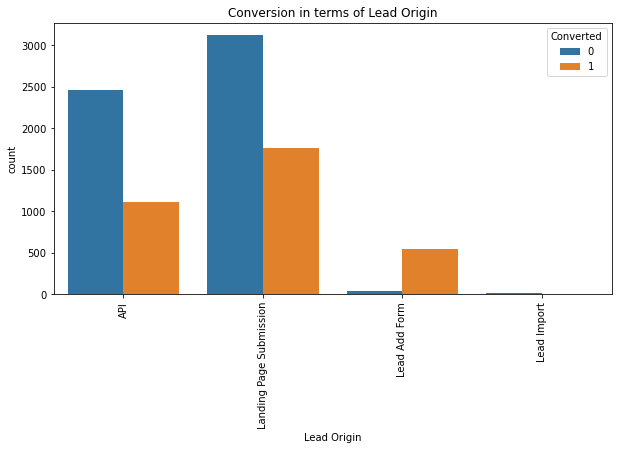

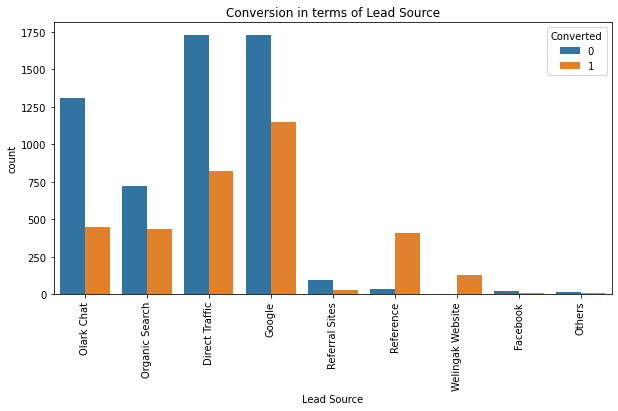

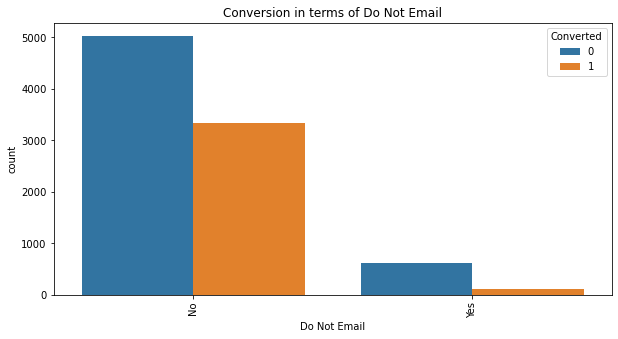

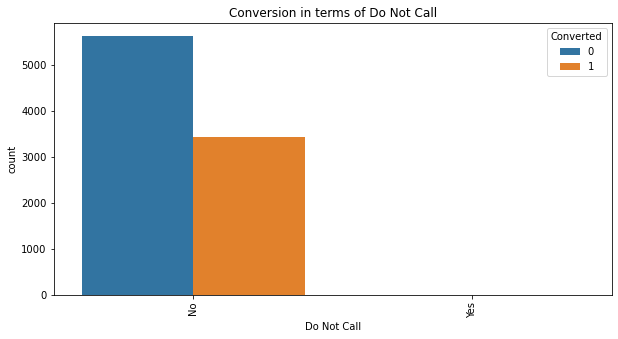

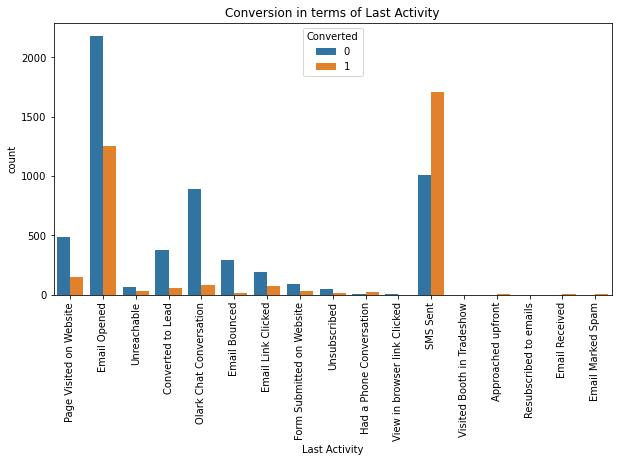

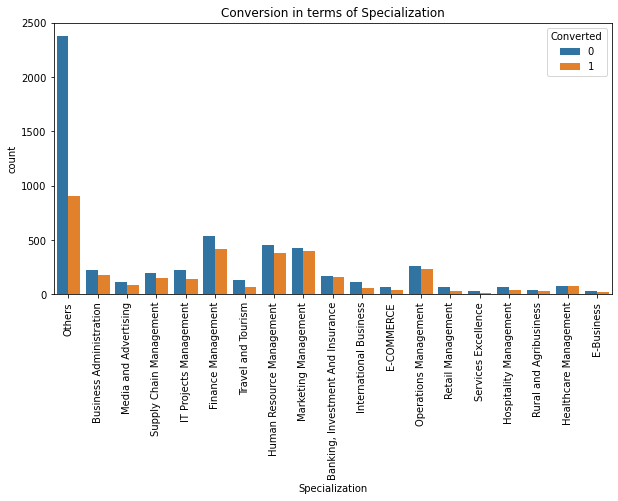

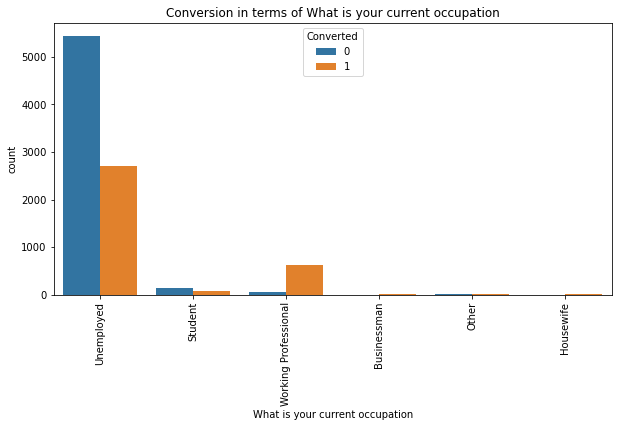

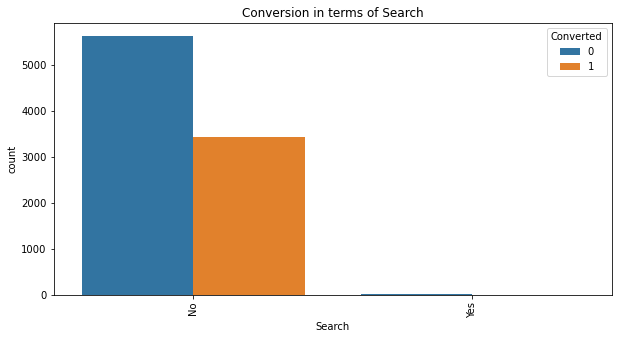

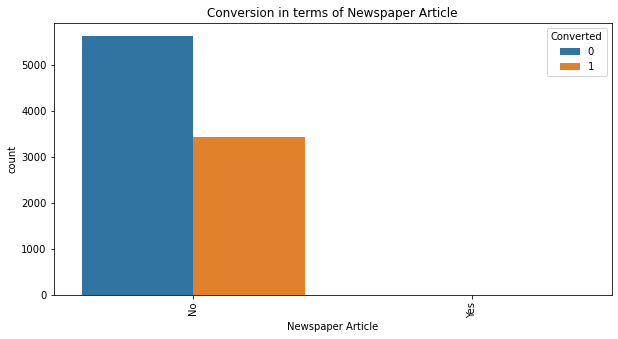

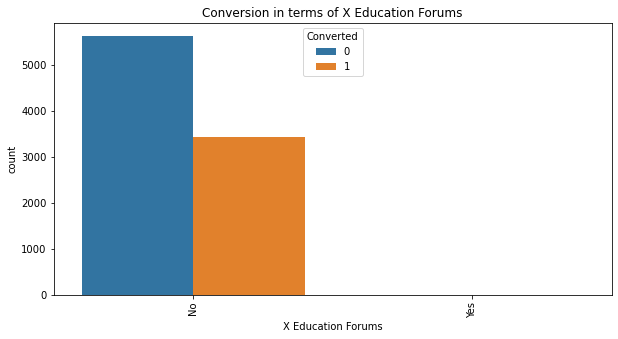

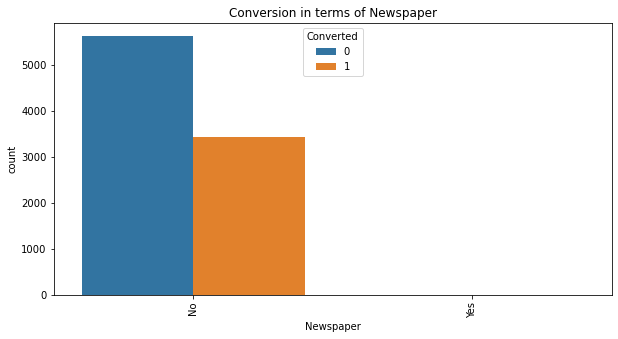

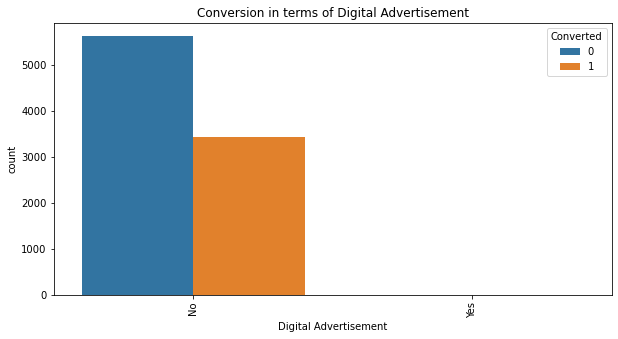

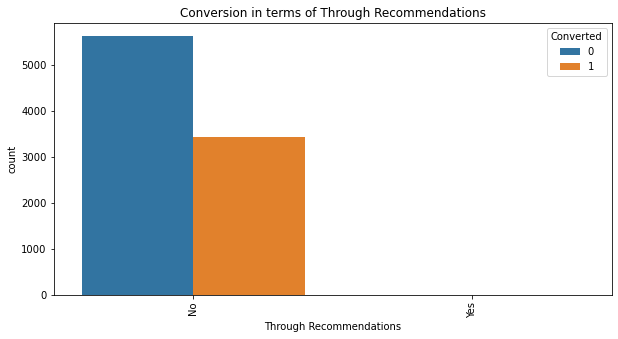

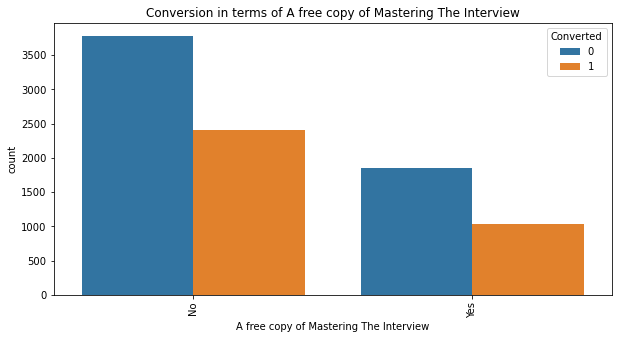

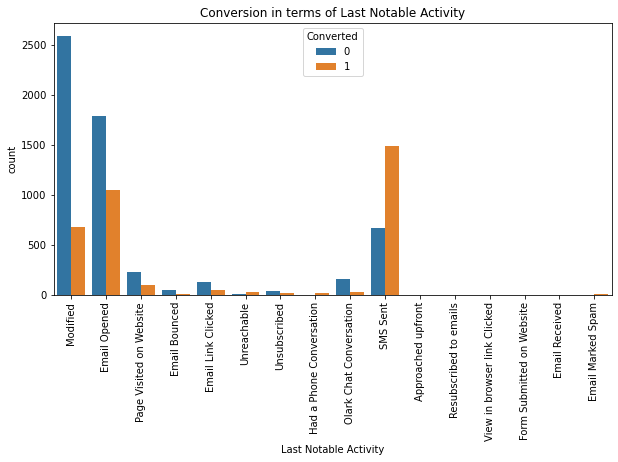

In [36]:
def countplot_col(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = "Converted", data = leads)
    plt.xticks(rotation=90)
    plt.title("Conversion in terms of "+col)
    plt.show()

    
columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Specialization',
           'What is your current occupation','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity']

for c in columns:
    countplot_col(c)

In [37]:
def conversion_summary(col):
    plt.figure(figsize=(10,5))
    convert = leads.pivot_table(values='Lead Number',index=col ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion(%)"] = round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending=False,by="Conversion(%)"))
    plt.show()
    
columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Specialization',
           'What is your current occupation','City']

for c in columns:
    conversion_summary(c)

Converted                   0     1  Conversion(%)
Lead Origin                                       
Lead Add Form              37   544           94.0
Landing Page Submission  3118  1767           36.0
API                      2463  1115           31.0
Lead Import                21     9           30.0


<Figure size 720x360 with 0 Axes>

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   127           98.0
Reference           33   410           93.0
Google            1726  1147           40.0
Others              14     9           39.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Facebook            22     9           29.0
Olark Chat        1305   448           26.0
Referral Sites      94    31           25.0


<Figure size 720x360 with 0 Axes>

Converted        0     1  Conversion(%)
Do Not Email                           
No            5027  3331           40.0
Yes            612   104           15.0


<Figure size 720x360 with 0 Axes>

Converted         0       1  Conversion(%)
Do Not Call                               
Yes             0.0     2.0          100.0
No           5639.0  3433.0           38.0


<Figure size 720x360 with 0 Axes>

Converted                          0       1  Conversion(%)
Last Activity                                              
Approached upfront               0.0     5.0          100.0
Email Marked Spam                0.0     2.0          100.0
Resubscribed to emails           0.0     1.0          100.0
Email Received                   0.0     2.0          100.0
Had a Phone Conversation         5.0    20.0           80.0
SMS Sent                      1011.0  1705.0           63.0
Email Opened                  2182.0  1250.0           36.0
Unreachable                     61.0    29.0           32.0
Email Link Clicked             194.0    73.0           27.0
Form Submitted on Website       88.0    28.0           24.0
Page Visited on Website        489.0   151.0           24.0
Unsubscribed                    45.0    14.0           24.0
View in browser link Clicked     5.0     1.0           17.0
Converted to Lead              374.0    54.0           13.0
Olark Chat Conversation        888.0    

<Figure size 720x360 with 0 Axes>

Converted                             0    1  Conversion(%)
Specialization                                             
Banking, Investment And Insurance   171  164           49.0
Healthcare Management                80   76           49.0
Marketing Management                426  397           48.0
Operations Management               265  234           47.0
Human Resource Management           457  380           45.0
Finance Management                  537  422           44.0
Business Administration             224  175           44.0
Supply Chain Management             198  148           43.0
Rural and Agribusiness               42   31           42.0
Media and Advertising               118   84           42.0
Hospitality Management               66   45           41.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   62           35.0
E-COMMERCE                           72 

<Figure size 720x360 with 0 Axes>

Converted                             0       1  Conversion(%)
What is your current occupation                               
Housewife                           0.0     9.0          100.0
Working Professional               55.0   622.0           92.0
Businessman                         3.0     5.0           62.0
Other                               6.0     9.0           60.0
Student                           132.0    74.0           36.0
Unemployed                       5443.0  2716.0           33.0


<Figure size 720x360 with 0 Axes>

Converted                       0     1  Conversion(%)
City                                                  
Thane & Outskirts             413   332           45.0
Other Cities of Maharashtra   250   196           44.0
Other Metro Cities            223   154           41.0
Other Cities                  408   272           40.0
Mumbai                       4296  2456           36.0
Tier II Cities                 49    25           34.0


<Figure size 720x360 with 0 Axes>

### Observations

##### From the above plots, we can infer that:
1. Lead Add Form has the highest conversion rate at 94%
2. API and Landing Page Submission have 31% and 36% conversion rate but they generate maximum leads counts
3. Lead Import has the least amount of conversions and leads count
4. To improve overall lead conversion rate, focus should be on improving lead conversion rate of 'API' and 'Landing Page Submission'. Also,there is a need to generate more leads from 'Lead Add form' since they have a very good conversion rate.
5. Few Lead sources have very low count.Hence we can merge them into common category 'Others'
6. Also , there are 2 categories with same name Google and google.Hence we will replace google with Google to have a single category
7. 'Google' and 'Direct Traffic' generates maximum number of leads but has conversion rate of 40% and 32%
8. 'Welingak website' and 'References' has highest conversion rates around 98% and 93% but generates less number of leads.
9. Olark chat' and 'Organic search' generates significant number of leads but their conversion rate is around 26% and 38%.
10. Lead source in 'others' category such as Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' generates very less leads
11. To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic and google lead source .Also , generate more leads from reference and welingak website since they have a very good conversion rate
12. Around 99% of customers do not like to be called or receive emails about the course
13. Median for converted and non-converted leads are same
14. People who visit the platform have equal chance(50-50) of applying and not applying for the course
15. People spending more time on website have more chances of opting for a course
16. People who spend less time on the website didn't opt for any courses
17. Median for converted and non-converted leads are same
18. People who visits 1 to 3 average number of pages on website have equal chances(50-50) of applying and not applying for the course
19. People who dont visit any pages have higher conversion chances
20. Maximum leads are generated from people with last activity - Email opened and SMS sent
21. Conversion rate is around 63% and 36%
22. Least leads are generated from people with last activity - Approached upfront,Email Marked Spam,Resubscribed to emails ,emails received,View in browser link Clicked,Visited Booth in Tradeshow
23. olark chat conversation and Page Visited on Website generates significant number of leads but their conversion rate is around 9% and 24%.
24. To improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity -olark chat conversation,SMS sent and Page Visited on Website
25. Most of the specialization have around 40-50% conversion rate
26. Working Professionals and Unemployed people generates maximum leads
27. Conversion rate for Working Professionals is high around 92% and Conversion rate for Unemployed is around 43%
28. To improve overall lead conversion rate, focus should be on improving lead conversion of unemployed. Also, generate more leads from Working Professionals.
29. Almost 99% customers have not seen the X education ad in search, Newspaper article, X Education Forums, Newspaper, Digital Advertisement or Through Recommendations
30. Maximum leads are generated from Mumbai city with conversion rate of around 40%. Hence focus should me more on increasing conversion rate of Mumbai city
31. Most of the customers didnt want the free copy of Mastering The Interview.
32. Customers who opted for free copy had conversion rate of 36% while the ones who didnt opt had conversion rate of 47%
33. Maximum leads are generated from people with last activity - Email opened and SMS sent
34. Least leads are generated from people with last activity - Approached upfront,Email Marked Spam,Resubscribed to emails ,emails received,View in browser link Clicked,Visited Booth in Tradeshow
35. olark chat conversation and Page Visited on Website generates significant number of leads but their conversion rate is around 9% and 24%
36. To improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity -olark chat conversation, SMS sent and Page Visited on Website

#### Checking correlation among variables

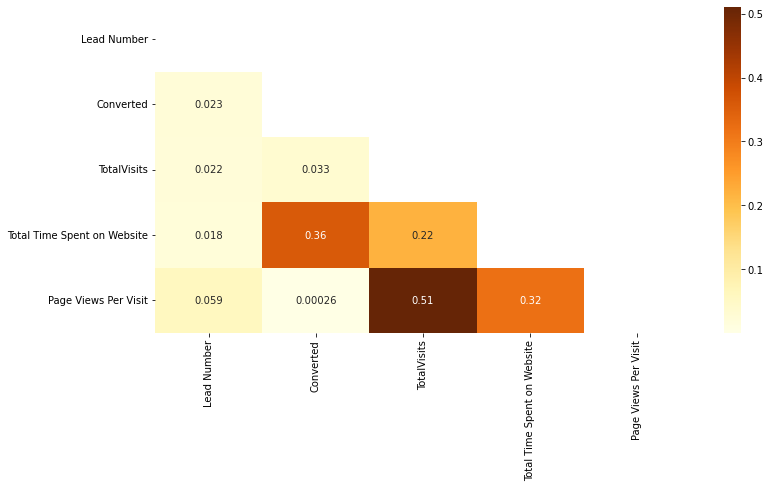

In [38]:
plt.figure(figsize = (12,6))
mask = np.zeros_like(leads.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(leads.corr(), mask=mask, annot=True, cmap="YlOrBr")
plt.show()

### Observations
1. Total visits and Page views per visit column are correlated.
2. Hence we should have either of this column in our model to avoid multi-collinearity

In [39]:
# Based on our data analysis, we conclude that many variables are not significant to the model
# Hence we can drop them for further analysis
leads = leads.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [40]:
leads.shape

(9074, 14)

### Data Preparation

#### 1. Converting binary variables (Yes/No) to 1/0

In [41]:
# List of binary variables
varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
leads[varlist] = leads[varlist].apply(binary_map)

#### 2. Creation of Dummy Variables

In [42]:
# Creating dummy variables for the categorical variables
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
         'City','Last Notable Activity']
dummy_data = pd.get_dummies(leads[dummy], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
# Merging dummy data with the original dataset
leads = pd.concat([leads, dummy_data], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
# Drop the parent or original columns 
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
leads = leads.drop(drop_cols, axis=1)
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
# Rechecking the shape of dataframe
leads.shape

(9074, 77)

#### 3. Splitting the data into TEST(testing) and TRAIN(training) sets

In [46]:
# Putting feature variable to X
X = leads.drop(['Converted'], 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
# Putting the target variable in y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4. Rescaling the features

In [49]:
# Create object of StandardScaler
scaler = StandardScaler()

# Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


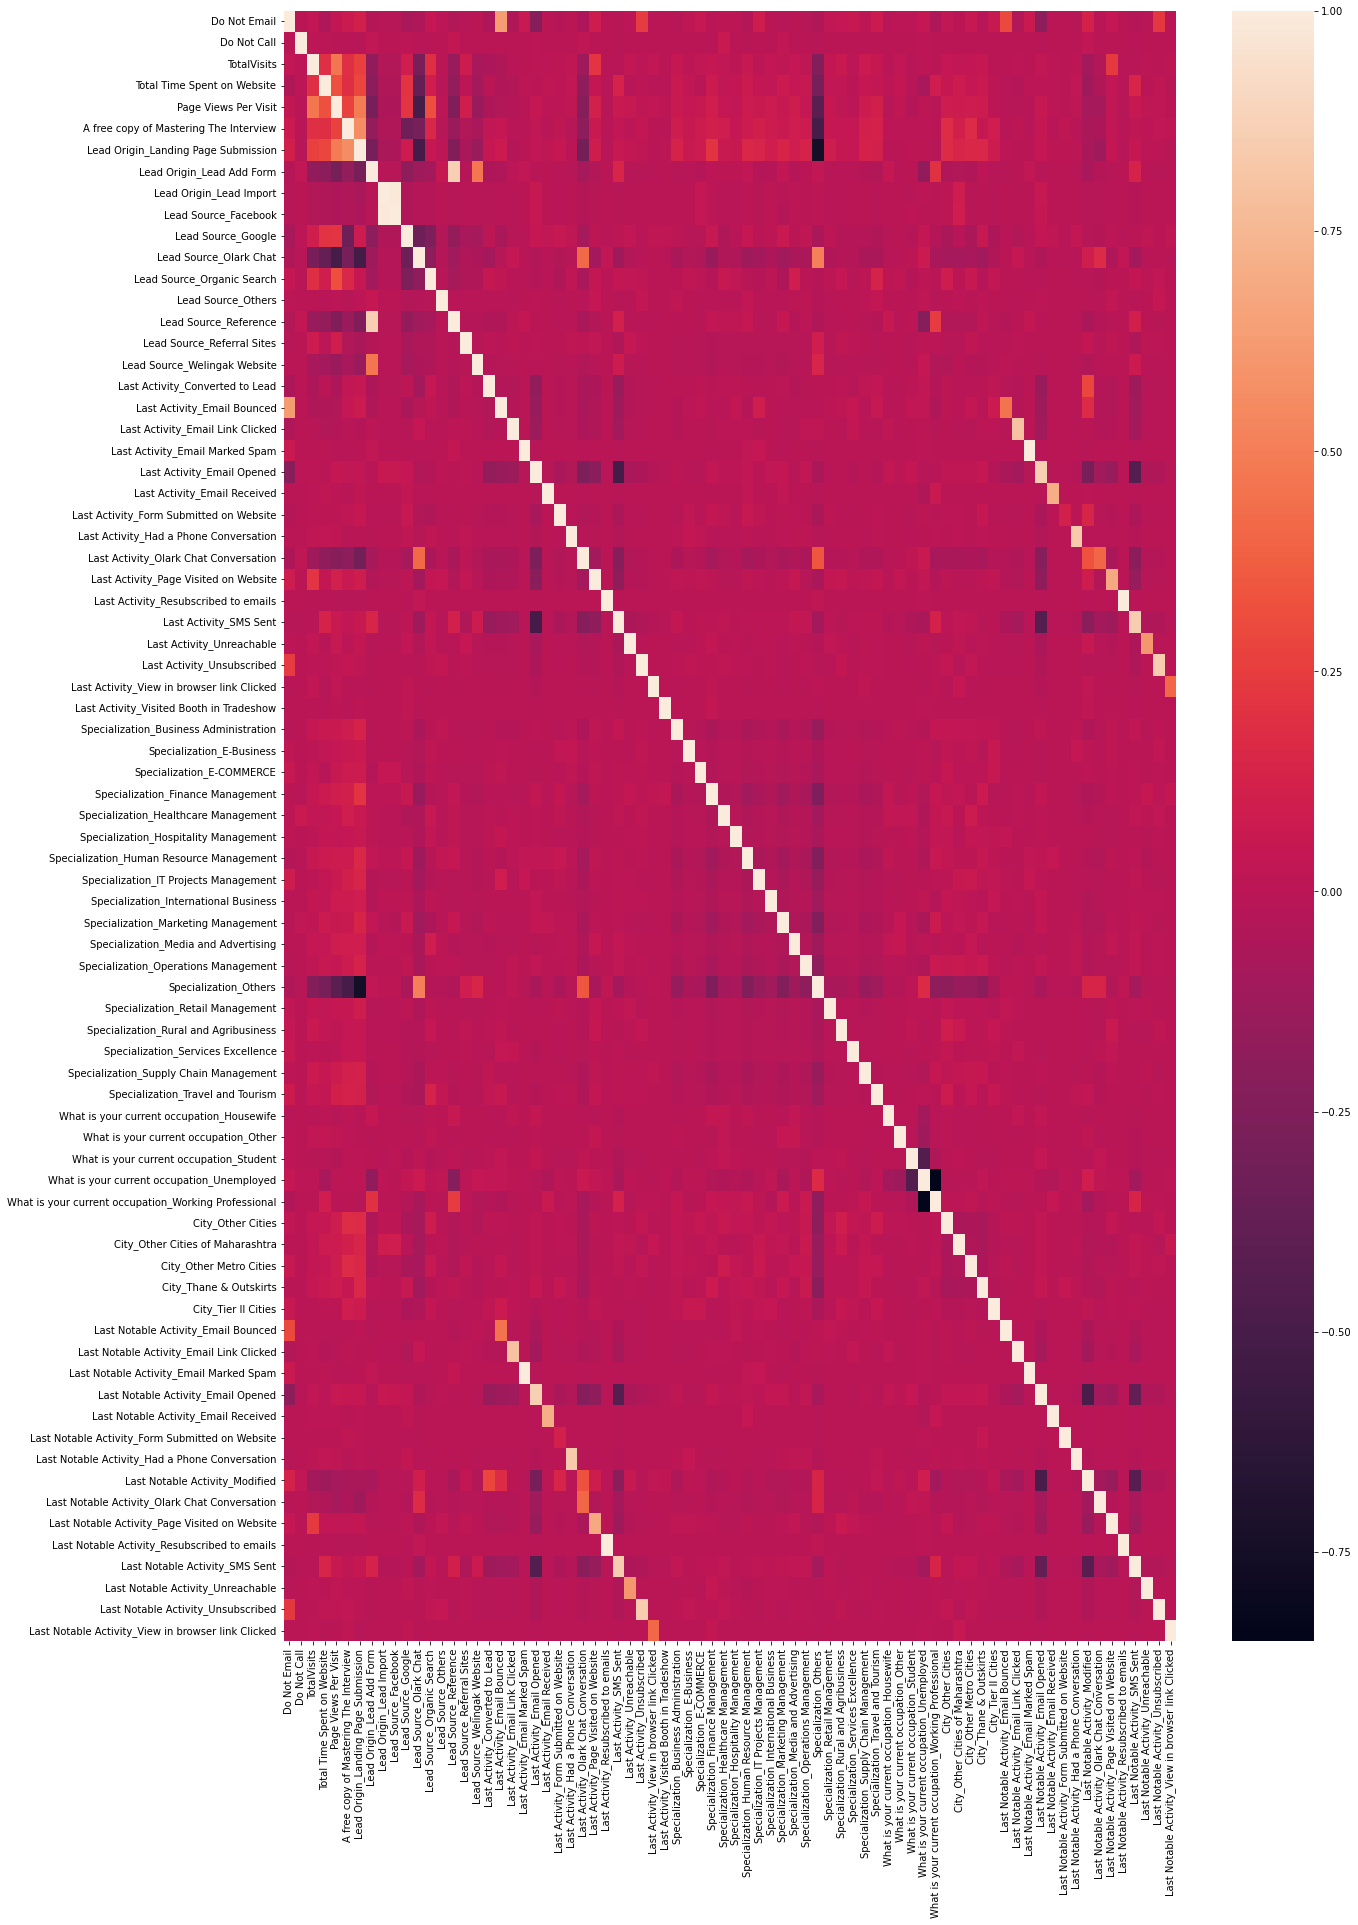

In [50]:
# To check the correlation among variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

### Building the Model
#### 1. Feature selection using RFE

In [51]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [52]:
rfe.support_

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 37),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Others', False, 40),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 4),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Marked Spam', False, 17),
 ('Last Activity_Email Opened', False, 49),
 ('Last Activity_Email Received', False, 48),
 ('Last Activity_Form Submitted on Website', 

In [54]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E

#### 2. Building a Model

In [56]:
# Building Model No.1
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3041.4
Date:                Tue, 15 Nov 2022   Deviance:                       6082.8
Time:                        22:51:56   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8463      0.120     15.344      0.000       1.610       2.082
Do Not Email                                            -1.6063      0.183     -8.794      0.000      -1.964      -1.248
Lead Origin_Landing Page Submission                     -1.2589      0.111    -11.308      0.000      -1.477      -1.041
Lead Origin_Lead Add Form                                2.0767      0.225      9.242      0.000       1.636       2.517
Lead Source_Welingak Website                             2.7132      0.759      3.577      0.000       1.226       4.200
Last Activity_Email Bounced                             -1.2695      0.420     -3.022      0.003      -2.093      -0.446
Last Activity_Had a Phone Conversation                   1.8401      0.758      2.429      0.015       0.355       3.325
Last Activity_Olark Chat Conversation                   -1.2412      0.184     -6.763      0.000      -1.601      -0.881
Specialization_Others                                   -1.4082      0.115    -12.273      0.000      -1.633      -1.183
What is your current occupation_Housewife               22.5001    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Working Professional     2.6149      0.180     14.509      0.000       2.262       2.968
Last Notable Activity_Email Link Clicked                -1.9594      0.242     -8.093      0.000      -2.434      -1.485
Last Notable Activity_Email Opened                      -1.4905      0.080    -18.569      0.000      -1.648      -1.333
Last Notable Activity_Modified                          -1.9111      0.088    -21.706      0.000      -2.084      -1.738
Last Notable Activity_Olark Chat Conversation           -1.1988      0.337     -3.556      0.000      -1.859      -0.538
Last Notable Activity_Page Visited on Website           -1.6594      0.178     -9.345      0.000      -2.007      -1.311
========================================================================================================================
"""

In [57]:
#### 3. RFE Calculation

In [58]:
# calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

calculateVIF(X_train[col1])

,Features,VIF
12,Last Notable Activity_Modified,2.42
1,Lead Origin_Landing Page Submission,2.25
7,Specialization_Others,2.06
0,Do Not Email,1.84
11,Last Notable Activity_Email Opened,1.83
6,Last Activity_Olark Chat Conversation,1.82
4,Last Activity_Email Bounced,1.75
2,Lead Origin_Lead Add Form,1.49
3,Lead Source_Welingak Website,1.37
13,Last Notable Activity_Olark Chat Conversation,1.35


#### The p value for column 'What is your current occupation_Housewife' is very high and above the threshold. Hence we will drop this column from our model

In [59]:
col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [60]:
# Building Model No.2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3046.0
Date:                Tue, 15 Nov 2022   Deviance:                       6092.0
Time:                        22:51:56   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3119
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8496      0.120     15.380      0.000       1.614       2.085
Do Not Email                                            -1.6071      0.183     -8.798      0.000      -1.965      -1.249
Lead Origin_Landing Page Submission                     -1.2610      0.111    -11.338      0.000      -1.479      -1.043
Lead Origin_Lead Add Form                                2.0893      0.224      9.309      0.000       1.649       2.529
Lead Source_Welingak Website                             2.7014      0.759      3.561      0.000       1.215       4.188
Last Activity_Email Bounced                             -1.2683      0.420     -3.019      0.003      -2.092      -0.445
Last Activity_Had a Phone Conversation                   1.8406      0.758      2.429      0.015       0.356       3.326
Last Activity_Olark Chat Conversation                   -1.2397      0.184     -6.754      0.000      -1.599      -0.880
Specialization_Others                                   -1.4145      0.115    -12.338      0.000      -1.639      -1.190
What is your current occupation_Working Professional     2.6106      0.180     14.483      0.000       2.257       2.964
Last Notable Activity_Email Link Clicked                -1.9528      0.241     -8.097      0.000      -2.426      -1.480
Last Notable Activity_Email Opened                      -1.4836      0.080    -18.499      0.000      -1.641      -1.326
Last Notable Activity_Modified                          -1.9108      0.088    -21.703      0.000      -2.083      -1.738
Last Notable Activity_Olark Chat Conversation           -1.1984      0.337     -3.554      0.000      -1.859      -0.538
Last Notable Activity_Page Visited on Website           -1.6596      0.178     -9.345      0.000      -2.008      -1.312
========================================================================================================================
"""

In [61]:
# Checking VIF
calculateVIF(X_train[col2])

,Features,VIF
11,Last Notable Activity_Modified,2.42
1,Lead Origin_Landing Page Submission,2.25
7,Specialization_Others,2.06
0,Do Not Email,1.84
10,Last Notable Activity_Email Opened,1.83
6,Last Activity_Olark Chat Conversation,1.82
4,Last Activity_Email Bounced,1.75
2,Lead Origin_Lead Add Form,1.49
3,Lead Source_Welingak Website,1.37
12,Last Notable Activity_Olark Chat Conversation,1.35


#### The p value and VIF value for column 'Last Activity_Had a Phone Conversation' is high and above the threshold. Hence we will drop this column

In [62]:
col3 = col2.drop('Last Activity_Had a Phone Conversation',1)
col3

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [63]:
# Building Model No.3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3049.5
Date:                Tue, 15 Nov 2022   Deviance:                       6099.1
Time:                        22:51:57   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3111
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8590      0.120     15.486      0.000       1.624       2.094
Do Not Email                                            -1.6078      0.183     -8.796      0.000      -1.966      -1.250
Lead Origin_Landing Page Submission                     -1.2624      0.111    -11.365      0.000      -1.480      -1.045
Lead Origin_Lead Add Form                                2.0841      0.224      9.287      0.000       1.644       2.524
Lead Source_Welingak Website                             2.7016      0.759      3.562      0.000       1.215       4.188
Last Activity_Email Bounced                             -1.2755      0.420     -3.036      0.002      -2.099      -0.452
Last Activity_Olark Chat Conversation                   -1.2478      0.183     -6.801      0.000      -1.607      -0.888
Specialization_Others                                   -1.4156      0.115    -12.361      0.000      -1.640      -1.191
What is your current occupation_Working Professional     2.6085      0.180     14.474      0.000       2.255       2.962
Last Notable Activity_Email Link Clicked                -1.9608      0.241     -8.131      0.000      -2.433      -1.488
Last Notable Activity_Email Opened                      -1.4916      0.080    -18.618      0.000      -1.649      -1.335
Last Notable Activity_Modified                          -1.9111      0.088    -21.736      0.000      -2.083      -1.739
Last Notable Activity_Olark Chat Conversation           -1.1985      0.337     -3.555      0.000      -1.859      -0.538
Last Notable Activity_Page Visited on Website           -1.6676      0.178     -9.392      0.000      -2.016      -1.320
========================================================================================================================
"""

In [64]:
# Checking VIF
calculateVIF(X_train[col3])

,Features,VIF
10,Last Notable Activity_Modified,2.42
1,Lead Origin_Landing Page Submission,2.25
6,Specialization_Others,2.06
0,Do Not Email,1.84
9,Last Notable Activity_Email Opened,1.83
5,Last Activity_Olark Chat Conversation,1.82
4,Last Activity_Email Bounced,1.75
2,Lead Origin_Lead Add Form,1.49
3,Lead Source_Welingak Website,1.37
11,Last Notable Activity_Olark Chat Conversation,1.35


### Observation

* The VIF values of all the variables are under threshold value 3.
* The p value of all variables are under threshold value 0.05.
* Hence we will consider Model 3 as our final model for further analysis

In [65]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.290062
1012    0.250884
9226    0.187296
4750    0.644861
7987    0.211729
1281    0.644861
2880    0.290062
4971    0.865175
7536    0.290062
1248    0.211729
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29006221, 0.25088438, 0.18729561, 0.64486078, 0.21172886,
       0.64486078, 0.29006221, 0.86517533, 0.29006221, 0.21172886])

### Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [67]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID
0,0,0.290062,3009
1,0,0.250884,1012
2,0,0.187296,9226
3,1,0.644861,4750
4,1,0.211729,7987


In [68]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.290062,3009,0
1,0,0.250884,1012,0
2,0,0.187296,9226,0
3,1,0.644861,4750,1
4,1,0.211729,7987,0


### Model Evaluation
#### 1. Confusion Matrix

In [69]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3380  525]
 [ 872 1574]]


In [70]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### 2. Overall Accuracy

In [71]:
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7800346402141395


#### 3. Sensitivity

In [72]:
 round((TP / float(TP+FN)),2)

0.64

#### 4. Specificity

In [73]:
round((TN / float(TN+FP)),2)

0.87

#### 5. False postive rate 

In [74]:
print(FP/ float(TN+FP))

0.13444302176696543


#### 6. Positive predictive value

In [75]:
print (TP / float(TP+FP))

0.7498808956646021


#### 7. Negative predictive value

In [76]:
print (TN / float(TN+ FN))

0.7949200376293509


#### 8. ROC Curve

#### ROC shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [78]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False)

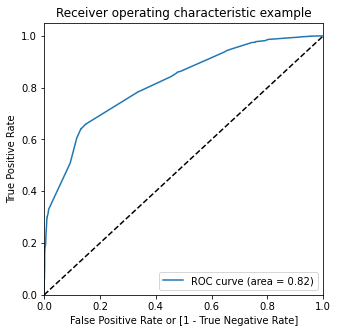

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

The ROC Curve should be a value close to 1. We are getting a value of 0.82 indicating a good predictive model.

#### 9. Optimal cutoff point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value.

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [81]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.290062,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.250884,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.187296,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.644861,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.211729,7987,0,1,1,1,0,0,0,0,0,0,0


In [82]:
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificty'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.385136     1.000000    0.000000
0.1          0.1  0.512990     0.980376    0.220230
0.2          0.2  0.575500     0.944399    0.344430
0.3          0.3  0.776256     0.661079    0.848399
0.4          0.4  0.776886     0.659035    0.850704
0.5          0.5  0.780035     0.643500    0.865557
0.6          0.6  0.776413     0.605887    0.883227
0.7          0.7  0.729964     0.323385    0.984635
0.8          0.8  0.724925     0.302535    0.989501
0.9          0.9  0.696583     0.221586    0.994110


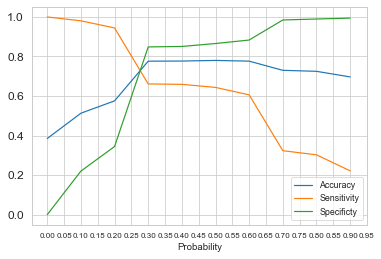

In [83]:
# Plotting accuracy sensitivity and specificity for various probabilities
sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

## Observation

From the above curve we can see that the optimal cutoff is at 0.27. This is the point where all the parameters - Accuracy, Sensitivity, Specificity are equally balanced

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.29,3009,0,1,1,1,0,0,0,0,0,0,0,0,29
1,0,0.25,1012,0,1,1,1,0,0,0,0,0,0,0,0,25
2,0,0.19,9226,0,1,1,0,0,0,0,0,0,0,0,0,19
3,1,0.64,4750,1,1,1,1,1,1,1,1,0,0,0,1,64
4,1,0.21,7987,0,1,1,1,0,0,0,0,0,0,0,0,21


In [85]:
# Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.290062,3009,0,1,1,1,0,0,0,0,0,0,0,1,29
1,0,0.250884,1012,0,1,1,1,0,0,0,0,0,0,0,0,25
2,0,0.187296,9226,0,1,1,0,0,0,0,0,0,0,0,0,19
3,1,0.644861,4750,1,1,1,1,1,1,1,1,0,0,0,1,64
4,1,0.211729,7987,0,1,1,1,0,0,0,0,0,0,0,0,21


In [130]:
# Let's check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7767280743190049

In [87]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2598, 1307],
       [ 530, 1916]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Sensitivity 
TP / float(TP+FN)

0.775530839231547

In [132]:
# Specificity
TN / float(TN+FP)

0.6557093425605537

In [133]:
# False postive rate 
print(FP/ float(TN+FP))

0.34429065743944637


In [134]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5623167155425219


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8366445916114791


## Observation
When we are selecting the optimal cutoff = 0.27, the various performance parameters Accuracy, Sensitivity & Specificity are all in the range of 80%

#### 10. Precision and Recall

In [136]:
# Calculating Precision
precision =round(TP/float(TP+FP),2)
precision

0.56

In [137]:
# Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.78

In [138]:
# Calculating precision using precision_score function from sklearn
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7340619307832422

In [139]:
# Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6590351594439902

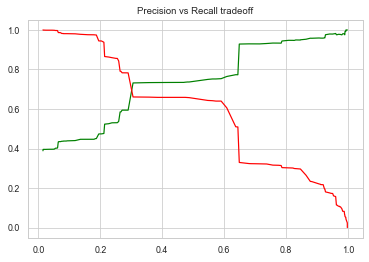

In [98]:
# Let us generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

#### 11. Making Predictions on Test set

In [99]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [100]:
X_test = X_test[col3]

X_test.shape

(2723, 13)

In [101]:
X_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1,0,0,0,0,0,1,0,1,0,0,0
7936,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,0,1,0,0,0,0,0,0,0,1,0,0
3830,0,1,0,0,0,0,0,0,0,1,0,0,0


In [102]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [103]:
# Making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred[:10]

3271    0.259566
1490    0.847280
7936    0.259566
4216    0.884119
3830    0.290062
1800    0.847280
6507    0.644861
4821    0.290062
4223    0.926048
4714    0.187296
dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.259566
1490,0.847280
7936,0.259566
4216,0.884119
3830,0.290062


In [106]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [107]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [108]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.259566
1,1,1490,0.847280
2,0,7936,0.259566
3,1,4216,0.884119
4,0,3830,0.290062


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [112]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [113]:
# Adding Lead_Score column
y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [114]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,3271,0,0.259566,26
1,1490,1,0.847280,85
2,7936,0,0.259566,26
3,4216,1,0.884119,88
4,3830,0,0.290062,29


In [115]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.27 else 0)

In [116]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,3271,0,0.259566,26,0
1,1490,1,0.847280,85,1
2,7936,0,0.259566,26,0
3,4216,1,0.884119,88,1
4,3830,0,0.290062,29,1


In [117]:
# Classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >27 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
679,2680,1,0.998574,100,1,Hot Lead
571,8106,1,0.998574,100,1,Hot Lead
1055,2674,1,0.998574,100,1,Hot Lead
2510,2673,1,0.998574,100,1,Hot Lead
2185,8090,1,0.998574,100,1,Hot Lead
...,...,...,...,...,...,...
2330,4053,0,0.003635,0,0,Cold Lead
2521,7122,0,0.003635,0,0,Cold Lead
1753,3682,0,0.003635,0,0,Cold Lead
272,4097,0,0.003635,0,0,Cold Lead


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.699228791773779

In [119]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1137,  597],
       [ 222,  767]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Sensitivity
TP / float(TP+FN)

0.775530839231547

In [122]:
# Specificity
TN / float(TN+FP)

0.6557093425605537

In [123]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.5623167155425219

In [124]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.775530839231547

In [125]:
# Determining Feature Importance
# Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.61
Lead Origin_Landing Page Submission                    -1.26
Lead Origin_Lead Add Form                               2.08
Lead Source_Welingak Website                            2.70
Last Activity_Email Bounced                            -1.28
Last Activity_Olark Chat Conversation                  -1.25
Specialization_Others                                  -1.42
What is your current occupation_Working Professional    2.61
Last Notable Activity_Email Link Clicked               -1.96
Last Notable Activity_Email Opened                     -1.49
Last Notable Activity_Modified                         -1.91
Last Notable Activity_Olark Chat Conversation          -1.20
Last Notable Activity_Page Visited on Website          -1.67
dtype: float64

In [126]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -59.51
Lead Origin_Landing Page Submission                    -46.73
Lead Origin_Lead Add Form                               77.14
Lead Source_Welingak Website                           100.00
Last Activity_Email Bounced                            -47.21
Last Activity_Olark Chat Conversation                  -46.19
Specialization_Others                                  -52.40
What is your current occupation_Working Professional    96.55
Last Notable Activity_Email Link Clicked               -72.58
Last Notable Activity_Email Opened                     -55.21
Last Notable Activity_Modified                         -70.74
Last Notable Activity_Olark Chat Conversation          -44.36
Last Notable Activity_Page Visited on Website          -61.73
dtype: float64

In [127]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             8
Lead Origin_Landing Page Submission                     10
Lead Origin_Lead Add Form                               12
Lead Source_Welingak Website                             0
Last Activity_Email Bounced                              9
Last Activity_Olark Chat Conversation                    6
Specialization_Others                                    4
What is your current occupation_Working Professional     1
Last Notable Activity_Email Link Clicked                 5
Last Notable Activity_Email Opened                      11
Last Notable Activity_Modified                           2
Last Notable Activity_Olark Chat Conversation            7
Last Notable Activity_Page Visited on Website            3
dtype: int64

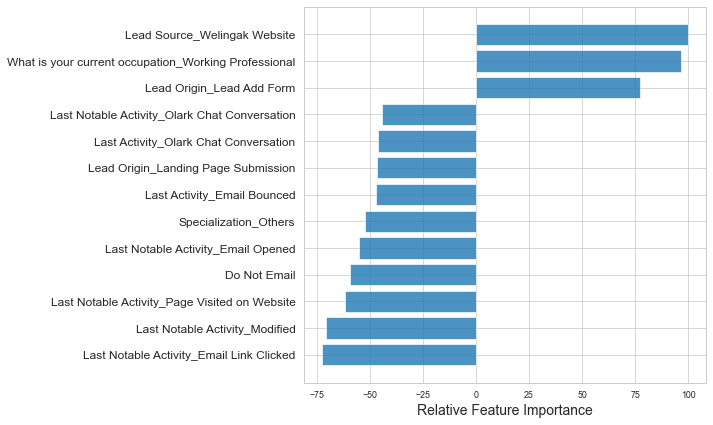

In [128]:
# Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

## Recommendations -


1. The sales team of the X-Education should focus on the leads having lead origin - lead add form , occupation - Working Professional , Lead source - Wellingak website.
2. Hot Leads are identified as 'Customers having lead score above 35. Sales Team of the company should first focus on the 'Hot Leads'
3. The 'Cold Leads'(Customer having lead score <= 35) should be focused after the Sales Team is done with the 'Hot Leads'.
4. There are many important variables like city, specialization , occupation which can potentially explain Conversion better.It is important for the management to make few of these information mandatory to fill , so that we can use in our model and build important decisions for the business.
5. We have high recall score than precision score. Hence this model has an ability to adjust with the company’s requirements in coming future.
6. Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.
7. It’s better to focus least on customers who do not want to be called about the course.
8. If the Last Notable Activity is Modified, he/she may not be the potential lead.


It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1. The total time spend on the Website
2. Total number of visits
3. When the lead source was:
    a. Google
    b. Direct traffic
    c. Organic search
    d. Welingak website
4. When the last activity was:
    a. SMS
    b. Olark chat conversation
5. When the lead origin is Lead add form
6. When their current occupation is as a working professional

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.